In [1]:
# فراخوانی کتابخانه های اولیه
import numpy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# وارد کردن دیتاست
shahin= pd.read_csv('C:\\Users\\sh.noori\\Desktop\\iris.csv')

In [3]:
shahin.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#  من اینجا استاندارد سازی نکردم ولی شما کدی که اجرا نکردم اینجا رو اجرا کنید چون تو K-means تأثیر گذاره

In [10]:
x = shahin.values[:, 0:4]
y= shahin.values[:, 4]

In [11]:
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [ ]:
from sklearn.preprocessing import StandardScaler
sclaer = StandardScaler()
x = scaler.fit_transform(x)

In [12]:
# مشخص کردن تعداد خوشه های لازم
inertia_list=[]
for k in numpy.arange(1, 10):
    kmn= KMeans(n_clusters=k)
    kmn.fit(x)
    inertia_list.append(kmn.inertia_)
    
inertia_list

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.34492380952382,
 46.53558205128205,
 38.930963049671746,
 34.2045677933178,
 30.274954264002254,
 27.76542447026658]

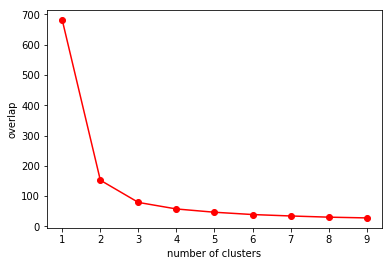

In [13]:
plt.plot(numpy.arange(1, 10), inertia_list, 'ro-')
plt.xlabel('number of clusters')
plt.ylabel('overlap')
plt.show()

In [14]:
# انجام عملیات خوشه بندی
kmn = KMeans(n_clusters=3)
kmn.fit(x)
labels = kmn.predict(x)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

#  روش های ارزیابی خوشه بندی : هر چه به 1 نزدیک باشه بهتر و چه به -1 نزدیک بشه، خوشه بندی ضعیف بوده

# adjusted_rand_score

In [15]:
from sklearn import metrics
metrics.adjusted_rand_score(labels, y)

0.7302382722834697

# Fowlkes Mallows Score

In [31]:
metrics.fowlkes_mallows_score(labels, y)

0.8208080729114153

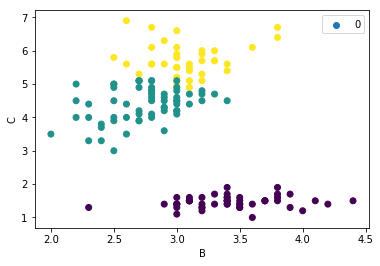

In [16]:
# ترسیم نمودار براکندگی دو بعدی براساس درآمد و سن به تفکیک خوشه ها
xs = x[:,1]
ys = x[:,2]
plt.scatter(xs, ys, c=labels)
plt.legend(labels, loc='upper right')
plt.xlabel('B')
plt.ylabel('C')
plt.show()

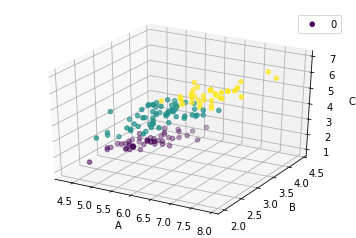

In [17]:
# ترسیم گراف پراکندگی سه بعدی
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = x[:,0]
ys = x[:,1]
zs = x[:,2]
ax.scatter(xs, ys, zs, c=labels)
ax.legend(labels, loc= 'upper right')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
plt.show()

In [18]:
columns = ['Cluster']
shahin2=pd.DataFrame(labels, index= None, columns=columns)
shahin2.head()

,Cluster
0,0
1,0
2,0
3,0
4,0


In [19]:
# خارج کردن دیتاست نهایی به همراه خوشه های مشتری
shahin_final=shahin.join(shahin2)
shahin_final
shahin_final.to_csv('C:\\Users\\sh.noori\\Desktop\\cluster.csv')

In [20]:
shahin_final

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
6,4.6,3.4,1.4,0.3,setosa,0
7,5.0,3.4,1.5,0.2,setosa,0
8,4.4,2.9,1.4,0.2,setosa,0
9,4.9,3.1,1.5,0.1,setosa,0


In [25]:
shahin_final.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,Cluster
species,,,,,
setosa,5.006,3.418,1.464,0.244,0.00
versicolor,5.936,2.770,4.260,1.326,1.04
virginica,6.588,2.974,5.552,2.026,1.72


In [26]:
shahin_final.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width,Cluster
species,,,,,
setosa,5.0,3.4,1.50,0.2,0
versicolor,5.9,2.8,4.35,1.3,1
virginica,6.5,3.0,5.55,2.0,2


In [27]:
shahin_final.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [29]:
shahin_final.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width,Cluster
species,,,,,
setosa,0.352490,0.381024,0.173511,0.107210,0.000000
versicolor,0.516171,0.313798,0.469911,0.197753,0.197949
virginica,0.635880,0.322497,0.551895,0.274650,0.453557


In [30]:
shahin_final.groupby('Cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
Cluster,,,,
0,5.006000,3.418000,1.464000,0.244000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053
